# Integral ANOVA
Conny Lin | July 6, 2020
* Integral analysis for slo-1 cell specific degradation mutants
* HKK796 is the control for VG902, VG903 and HKK1165
* Need to get posthoc

## Library, functions, and variables


In [1]:
# import library
import os, glob, sys
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import multicomp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# add local library
lib_home = '/Users/connylin/Code/language/python_lib'
if lib_home not in sys.path:
    sys.path.insert(0, lib_home)
import stats
from stats.report import print_stats_apa

In [38]:
# global variables
DATA_DIR = '/Users/connylin/Dropbox/CA/_Publications/Manuscript RL Alcohol hab model slo1/rankinlab_slo1paper/3-Results/Fig5-slo1 cell specific ko/data'
PRJ_TAG = 'integral_diff'
MEASURES = ['RevFreq','RevSpeed','RevDur']
GROUPS = {'HKK796': ['N2', 'N2_400mM', 'HKK796', 'HKK796_400mM'],
            'HKK1165': ['HKK796','HKK796_400mM', 'HKK1165', 'HKK1165_400mM'],
            'VG902': ['HKK796','HKK796_400mM', 'VG902', 'VG902_400mM'],
            'VG903': ['HKK796','HKK796_400mM', 'VG903', 'VG903_400mM']}
pvlimit = 0.001
alpha = 0.05

## get data
require rawdata.csv and mwtdb.csv generated by conver_shanespark_raw2csv.m

In [94]:
# import data
data = pd.read_csv(os.path.join(DATA_DIR, 'rawdata_all.csv'))
data

,tap,time,Ntrack,RevFreq,RevSpeed,RevDur,mwtpath,strain,rx,groupname
0,1,99.960,54,0.814815,0.247872,1.88,/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s...,N2,0mM,N2
1,2,109.973,52,0.627451,0.213750,1.60,/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s...,N2,0mM,N2
2,3,119.996,47,0.500000,0.211111,1.62,/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s...,N2,0mM,N2
3,4,129.951,46,0.395349,0.218571,1.40,/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s...,N2,0mM,N2
4,5,139.922,47,0.510638,0.188793,1.16,/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s...,N2,0mM,N2
...,...,...,...,...,...,...,...,...,...,...
6232,26,349.922,79,0.243590,0.309890,1.82,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,VG902,400mM,VG902_400mM
6233,27,359.919,64,0.229508,0.296377,1.38,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,VG902,400mM,VG902_400mM
6234,28,369.978,67,0.261538,0.295327,1.07,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,VG902,400mM,VG902_400mM
6235,29,379.917,70,0.235294,0.239785,0.93,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,VG902,400mM,VG902_400mM


In [97]:
# calculate integral ---
data_flipped = data.pivot(index='mwtpath', columns='tap', values=MEASURES)

RevFreq            \
tap                                                       1         2    
mwtpath                                                                  
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.787234  0.580000   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.680000  0.458333   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.923077  0.857143   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.750000  0.571429   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.884615  0.739130   
...                                                      ...       ...   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.553846  0.403846   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.666667  0.571429   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.687500  0.428571   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.688889  0.446809   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.541667  0.500000   

                                                                        \
tap                                                       3         4    
mwtpath                                                                  
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.537037  0.574074   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.461538  0.571429   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.833333  0.692308   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.500000  0.727273   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.740741  0.896552   
...                                                      ...       ...   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.416667  0.275862   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.404762  0.522727   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.377358  0.367347   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.405405  0.529412   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.500000  0.428571   

                                                                        \
tap                                                       5         6    
mwtpath                                                                  
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.565217  0.500000   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.409091  0.448276   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.739130  0.700000   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.500000  0.250000   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.857143  0.757576   
...                                                      ...       ...   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.288889  0.311111   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.510638  0.339623   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.204545  0.439024   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.409091  0.421053   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.458333  0.636364   

                                                                        \
tap                                                       7         8    
mwtpath                                                                  
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.511628  0.418182   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.440000  0.615385   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.650000  0.913043   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.583333  0.333333   
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_...  0.592593  0.714286   
...                                                      ...       ...   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.280000  0.307692   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.392857  0.372093   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.333333  0.302326   
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_...  0.

In [137]:
# calculate integral ---
df_output = pd.DataFrame(np.zeros([data_flipped.shape[0], len(MEASURES)]), index=data_flipped.index.values, columns=MEASURES)

for msr in MEASURES: 
    for i in data_flipped.index: 
        df_output.loc[i,msr] = integrate.simps(data_flipped[msr].loc[i].values)
df_output

# report missing values in integral analysis --
print(f'result has {df_output.shape[0]} plates')
print('remove missing plates')
# remove missing values (not sure why dropna() doesn't work)
bol_output = (df_output == 'NaN')
ind_to_drop = df_output.index[bol_output.any(axis=1)]
df_output.drop(index=ind_to_drop,inplace=True)
print(f'len of output {len(df_output)}') 
# ensure data are in the right datatype
for msr in MEASURES: # for each measure
    df_output[msr] = df_output[msr].astype('float64').copy()

result has 208 plates
remove missing plates
len of output 208


In [138]:
df_output

,RevFreq,RevSpeed,RevDur
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_175848,15.547253,7.458348,43.951667
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_180631,13.468768,7.833136,38.301667
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181019,19.836593,7.923144,41.754167
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181604,13.288285,7.436463,39.724167
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181932,17.349683,7.454432,33.300000
...,...,...,...
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_124120,7.355497,8.568234,49.252500
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_132713,9.608125,9.080057,43.035833
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_134430,8.316759,9.990941,45.706667
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_140628,9.857949,9.746198,47.170000


In [163]:
# get group name
mwtpath = pd.Series(df_output.index.values)
db = mwtpath.str.split(pat='/', expand=True)
df_output['groupname'] = db.loc[:, 5].values

,RevFreq,RevSpeed,RevDur,groupname
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_175848,15.547253,7.458348,43.951667,HKK1165
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_180631,13.468768,7.833136,38.301667,HKK1165
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181019,19.836593,7.923144,41.754167,HKK1165
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181604,13.288285,7.436463,39.724167,HKK1165
/Volumes/COBOLT/MWT/20190127X_XX_100s30x10s10s_slo1/HKK1165/20190127_181932,17.349683,7.454432,33.300000,HKK1165
...,...,...,...,...
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_124120,7.355497,8.568234,49.252500,VG903_400mM
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_132713,9.608125,9.080057,43.035833,VG903_400mM
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_134430,8.316759,9.990941,45.706667,VG903_400mM
/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s_slo1/VG903_400mM/20190418_140628,9.857949,9.746198,47.170000,VG903_400mM



RevFreq ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,929.876518,309.958839,51.451245,4.809146e-17
Residual,64.0,385.556572,6.024321,NaN,NaN


F(3)=51.451, p<0.001
RevFreq: F(3)=51.451, p<0.001



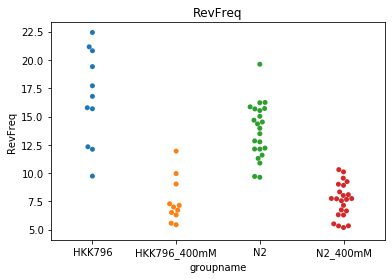


RevSpeed ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,158.252593,52.750864,42.043023,3.912540e-15
Residual,64.0,80.300014,1.254688,NaN,NaN


F(3)=42.043, p<0.001
RevSpeed: F(3)=42.043, p<0.001



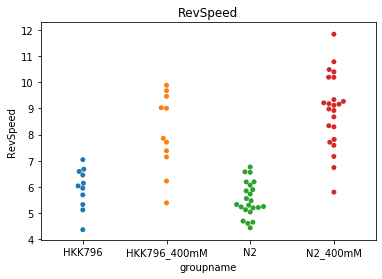


RevDur ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,2346.604093,782.201364,19.121316,5.772946e-09
Residual,64.0,2618.067047,40.907298,NaN,NaN


F(3)=19.121, p<0.001
RevDur: F(3)=19.121, p<0.001



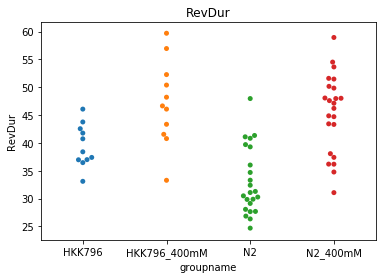


/Users/connylin/Dropbox/CA/_Publications/Manuscript RL Alcohol hab model slo1/rankinlab_slo1paper/3-Results/Fig5-slo1 cell specific ko/data/VG902/ complete

RevFreq ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,580.700283,193.566761,18.980199,9.466576e-08
Residual,39.0,397.735746,10.198352,NaN,NaN


F(3)=18.980, p<0.001
RevFreq: F(3)=18.980, p<0.001



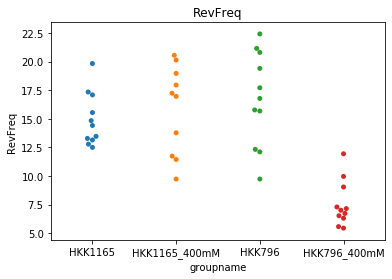


RevSpeed ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,25.746887,8.582296,7.662479,0.000383
Residual,39.0,43.681625,1.120042,NaN,NaN


F(3)=7.662, p<0.001
RevSpeed: F(3)=7.662, p<0.001



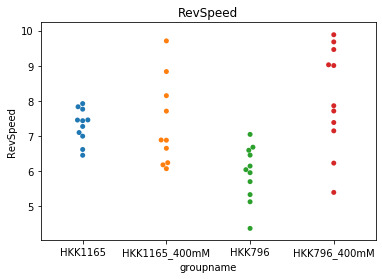


RevDur ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,462.058376,154.019459,5.503672,0.002992
Residual,39.0,1091.409400,27.984856,NaN,NaN


F(3)=5.504, p=0.003
RevDur: F(3)=5.504, p=0.003



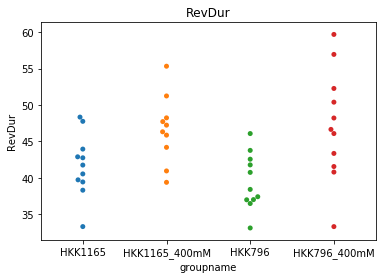


/Users/connylin/Dropbox/CA/_Publications/Manuscript RL Alcohol hab model slo1/rankinlab_slo1paper/3-Results/Fig5-slo1 cell specific ko/data/VG902/ complete

RevFreq ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,797.350394,265.783465,34.159866,1.984374e-12
Residual,53.0,412.370577,7.780577,NaN,NaN


F(3)=34.160, p<0.001
RevFreq: F(3)=34.160, p<0.001



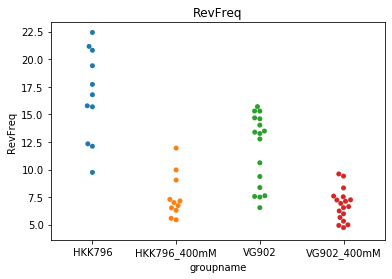


RevSpeed ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,106.061314,35.353771,33.47926,2.807656e-12
Residual,53.0,55.967481,1.055990,NaN,NaN


F(3)=33.479, p<0.001
RevSpeed: F(3)=33.479, p<0.001



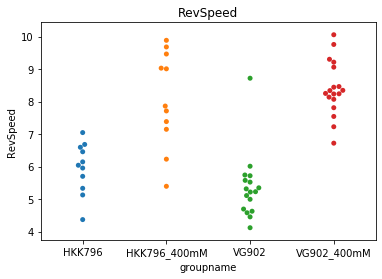


RevDur ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,684.582606,228.194202,6.163753,0.00113
Residual,53.0,1962.163699,37.021957,NaN,NaN


F(3)=6.164, p=0.001
RevDur: F(3)=6.164, p=0.001



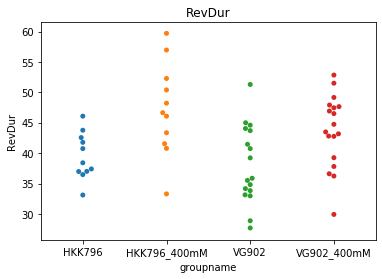


/Users/connylin/Dropbox/CA/_Publications/Manuscript RL Alcohol hab model slo1/rankinlab_slo1paper/3-Results/Fig5-slo1 cell specific ko/data/VG902/ complete

RevFreq ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,542.259349,180.753116,21.783154,2.522668e-09
Residual,53.0,439.785492,8.297839,NaN,NaN


F(3)=21.783, p<0.001
RevFreq: F(3)=21.783, p<0.001



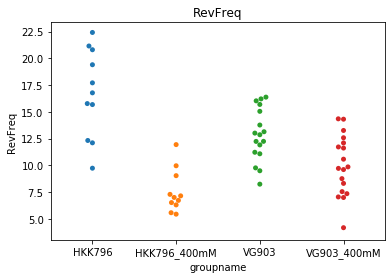


RevSpeed ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,116.756458,38.918819,40.033636,1.181934e-13
Residual,53.0,51.524109,0.972153,NaN,NaN


F(3)=40.034, p<0.001
RevSpeed: F(3)=40.034, p<0.001



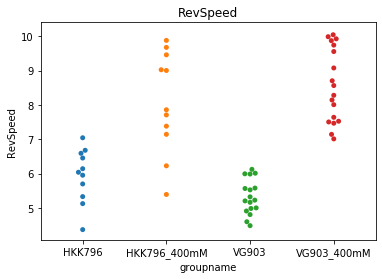


RevDur ----------------


,df,sum_sq,mean_sq,F,PR(>F)
groupname,3.0,363.569699,121.189900,3.435716,0.023275
Residual,53.0,1869.498382,35.273554,NaN,NaN


F(3)=3.436, p=0.023
RevDur: F(3)=3.436, p=0.023



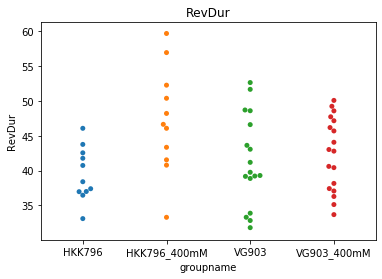


/Users/connylin/Dropbox/CA/_Publications/Manuscript RL Alcohol hab model slo1/rankinlab_slo1paper/3-Results/Fig5-slo1 cell specific ko/data/VG902/ complete


In [168]:
# get strain names
# glob for strain folders
strain_dirs = glob.glob(DATA_DIR+'/*')
sub_dir = 'TWR/Dance_ShaneSpark4'
iv = 'groupname'

for strain in GROUPS.keys():
    # create excel graphing output ---
    savename = f'graph_data_{strain}_{PRJ_TAG}.xlsx'
    savepath = os.path.join(DATA_DIR,savename)
    # reports ---
    savename = f'anova_{strain}_{PRJ_TAG}.txt'
    filename = os.path.join(DATA_DIR, savename)
    text_file = open(filename, 'w')
    text_file.write('ANOVA Integral\n')

    # save to excel
    with pd.ExcelWriter(savepath) as writer:
        for msr in MEASURES:
            print(f'\n{msr} ----------------')
            # get data
            i = df_output[iv].isin(GROUPS[strain]).values
            df = df_output.loc[i, [iv, msr]].copy()
            # create summary
            t = df.groupby(iv).agg(['count','mean','sem'])
            # save to excel
            t.to_excel(writer, sheet_name=msr)

            # run anova 
            lm = ols(f'{msr} ~ {iv}', data=df).fit()
            anovaT = anova_lm(lm)
            display(anovaT)
            # report result in APA format
            anova_apa = print_stats_apa(anovaT.columns[3], 
                                        anovaT.loc[iv,'df'],
                                        anovaT.loc[iv,anovaT.columns[3]], 
                                        anovaT.loc[iv,'PR(>F)'], 
                                        pvalue_limit = pvlimit, 
                                        alpha=alpha,
                                        separator='',
                                        show=True)
            output_str = f'{msr}: {anova_apa}\n'
            print(output_str)
            text_file.write(output_str)

            # print swarm plot
            # make graph
            plt.figure()
            sns.swarmplot(x='groupname',y=msr,data=df)
            plt.title(msr)
            # create save file name
            savefname = f'{msr}_swarmplot_{strain}_{PRJ_TAG}.jpeg'
            # construct save path
            savepath = os.path.join(DATA_DIR, savefname)
            # save fig
            plt.savefig(savepath)
            plt.show() 
            plt.close()         
        
    text_file.close()
    print(f'\n{strain_dir} complete')
    print('=============================================')
    